<h1><center>
    ECE 438 - Laboratory 8<br/>
    Number Representation and Waveform Quantization<br/>
    <small>Last Updated on May 5, 2022</small><br/>
    <br/>
    Date: March 23, 2023<br/>
    Section: Thursday 11:30am<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin|CJD |1.5 Hr |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of uniform quantizer (45 pts)**: *Image: original and quantized images, comparison, questions. Audio: Python figures, questions*||||
|**Understanding of error analysis (35 pts)**: *Error histograms, correlation, PSNR, rate-distortion curve, questions*||||
|**Understanding of max quantizer (20 pts)**: *Histograms, PSNR, comparison with uniform quantizer*||||

In [356]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import xcorr, lloyds

In [357]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 3.3: Image Quantization</left></h3>

**1. Load the image and display it using the following sequence of commands.**

```python
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()
```

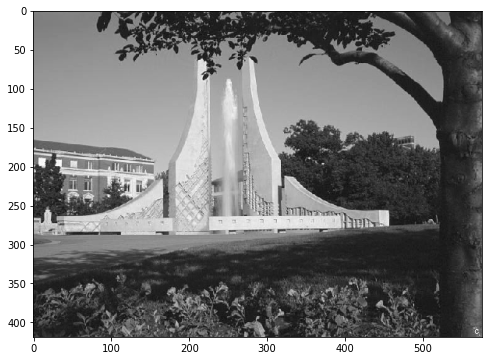

In [358]:
# insert your code here
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()


**2. Print the data type of this image, then convert the image matrix to type `float`, and print the data type of this image again.**

* Use `image.dtype` to get the data type of `image`.

In [359]:
# insert your code here
print(image.dtype)

image = image.astype(float)

print(image.dtype)


uint8
float64


**3. Complete the function below which will uniformly quantize an input array ```X``` (either a vector or a matrix) to an ```numBits```-bit array.**

In [360]:
def Uquant(X, numBits):
    """
    Parameters
    ---
    X: the input array to be quantized
    numBits: the number of bits. The number of quantization levels will be 2^numBits.
    
    Returns
    ---
    Y: the quantized array
    """
    delta = ( np.amax(X) - np.amin(X) ) / ( 2 ** numBits - 1)
    Y = np.around( ( X - np.amin(X) ) / delta ) * delta + np.amin(X)
    return Y

**4. Use this function to quantize the fountain image to $7$, $6$, $5$, $4$, $3$, $2$, $1$ b/pel, and display and observe the output images. Don't forget the titles of the images.**

* To display a grayscale image `image`, use the following commands:
```python
plt.imshow(image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()
```

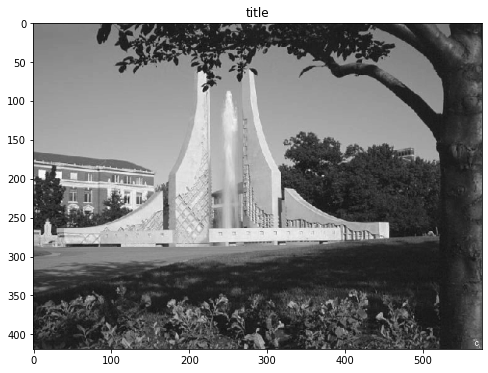

In [361]:
# insert your code here
plt.imshow(Uquant(image, 7), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

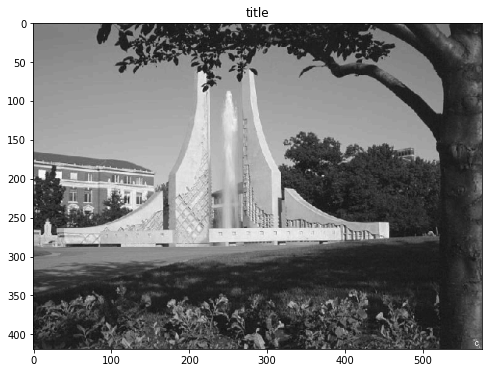

In [362]:
plt.imshow(Uquant(image, 6), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

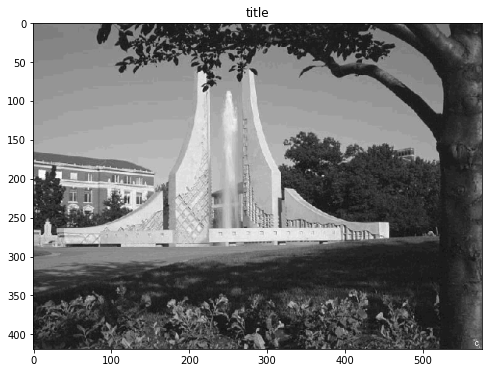

In [363]:
plt.imshow(Uquant(image, 5), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

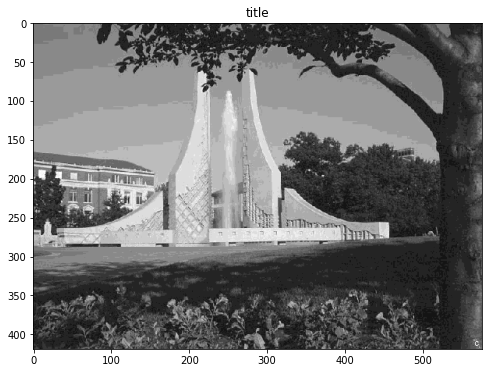

In [364]:
plt.imshow(Uquant(image, 4), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

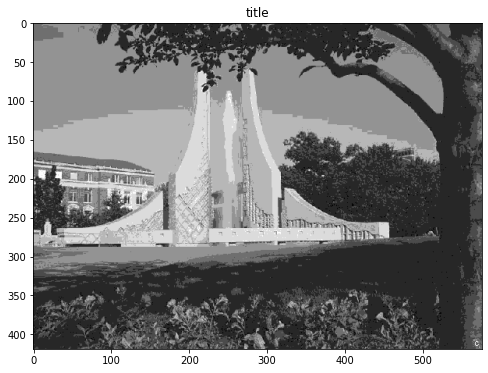

In [365]:
plt.imshow(Uquant(image, 3), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

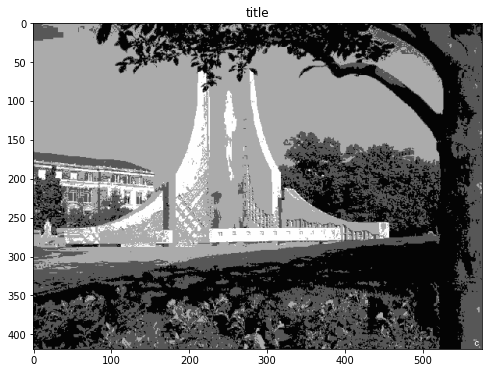

In [366]:
plt.imshow(Uquant(image, 2), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

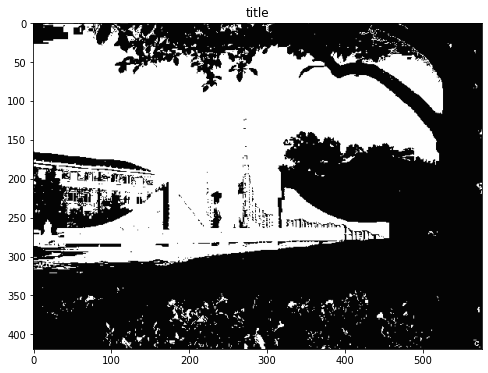

In [367]:
plt.imshow(Uquant(image, 1), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

**5. Describe the artifacts (errors) that appear in the image as the number of bits is lowered.**

insert your answer here

**6. Note the number of b/pel at which the image quality noticeably deteriorates.**

insert your answer here

**7. Compare each of four quantized images ($7$, $4$, $2$ and $1$ b/per) to the original.**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.4: Audio Quantization</left></h3>

**1. Use your function `Uquant()` to quantize each of these signals: ```speech.au``` and ```music.au``` to 7, 4, 2 and 1 bits/sample. Listen to the original and quantized signals.**

* To read an audio file:
```python
speech, fs = sf.read("speech.au")  # speech is the signal vector, and fs is the sampling frequency
```
* To play a signal
```python
ipd.Audio(speech, rate=fs)
```

In [368]:
# insert your code here
speech, fs = sf.read("speech.au")
ipd.Audio(speech, rate=fs)

In [369]:
qs7 = Uquant(speech, 7)
ipd.Audio(qs7, rate=fs)

In [370]:
qs4 = Uquant(speech, 4)
ipd.Audio(qs4, rate=fs)

In [371]:
qs2 = Uquant(speech, 2)
ipd.Audio(qs2, rate=fs)

In [372]:
qs1 = Uquant(speech, 1)
ipd.Audio(qs1, rate=fs)

In [373]:
# insert your code here
music, fs = sf.read("music.au")
ipd.Audio(music, rate=fs)

In [374]:
qm7 = Uquant(music, 7)
ipd.Audio(qm7, rate=fs)

In [375]:
qm4 = Uquant(music, 4)
ipd.Audio(qm4, rate=fs)

In [376]:
qm2 = Uquant(music, 2)
ipd.Audio(qm2, rate=fs)

In [377]:
qm1 = Uquant(music, 1)
ipd.Audio(qm1, rate=fs)

**2. For each signal, describe the change in quality as the number of b/sample is reduced.**

insert your answer here

**3. For each signal, is there a point at which the signal quality deteriorates drastically? At what point (if any) does it become incomprehensible?**

insert your answer here

**4. Which signal’s quality deteriorates faster as the number of levels decreases?**

insert your answer here

**5. Do you think 4 b/sample is acceptable for telephone systems? What about 2 b/sample?**

insert your answer here

**6. Plot the four quantized `speech` signals over the index range $[7200:7400)$. Generate a similar figure for the `music` signal, using the same indices.**

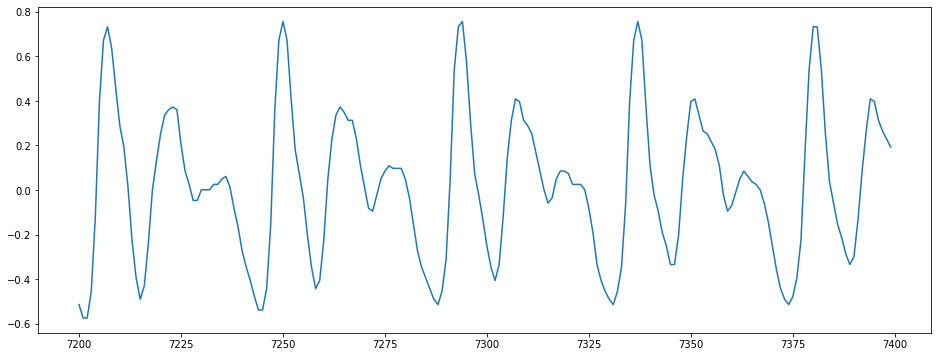

In [378]:
# insert your code here
plt.plot(np.arange(7200,7400,1), qs7[7200:7400])


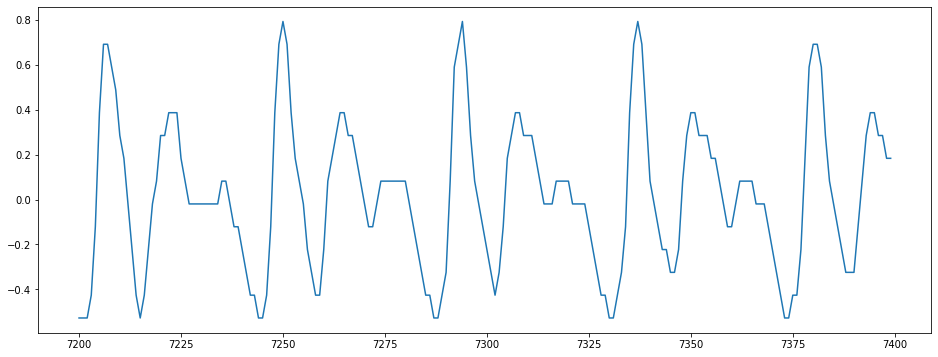

In [379]:
plt.plot(np.arange(7200,7400,1), qs4[7200:7400])

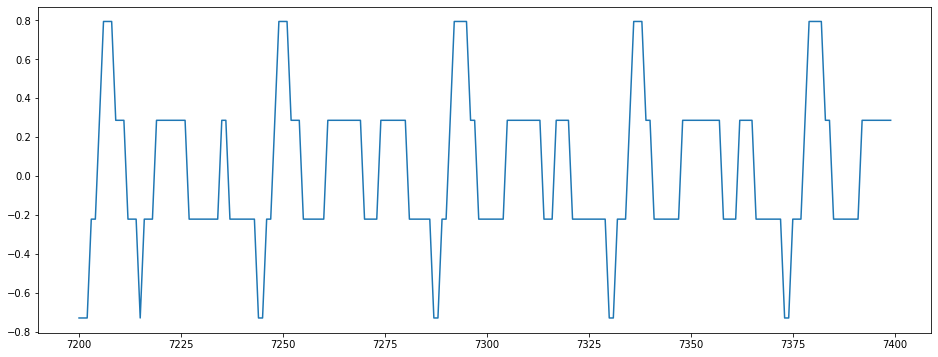

In [380]:
plt.plot(np.arange(7200,7400,1), qs2[7200:7400])

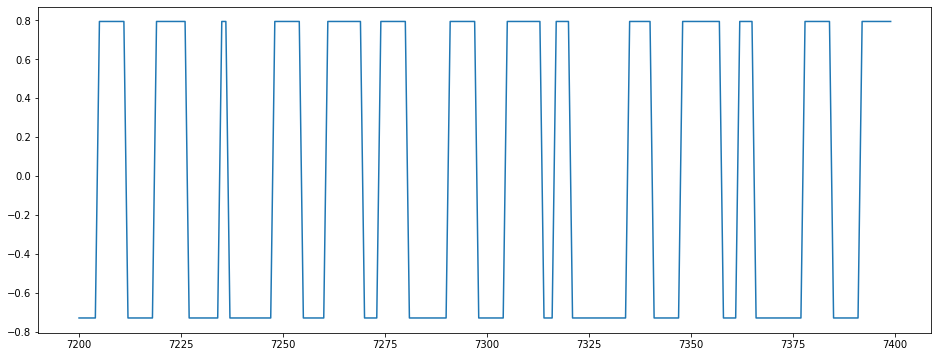

In [381]:
plt.plot(np.arange(7200,7400,1), qs1[7200:7400])

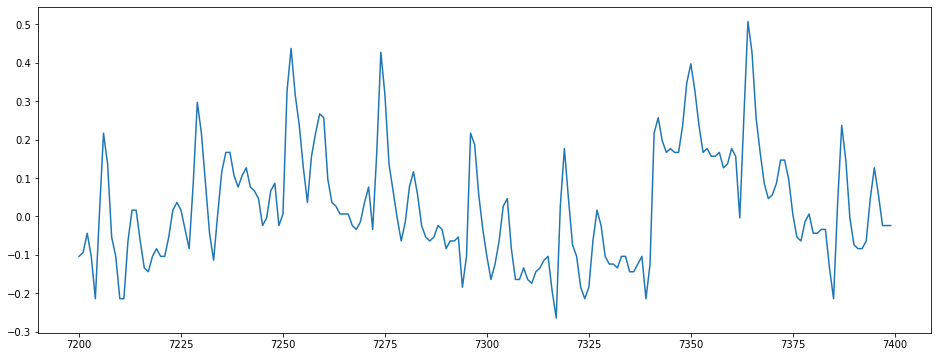

In [382]:
plt.plot(np.arange(7200,7400,1), qm7[7200:7400])

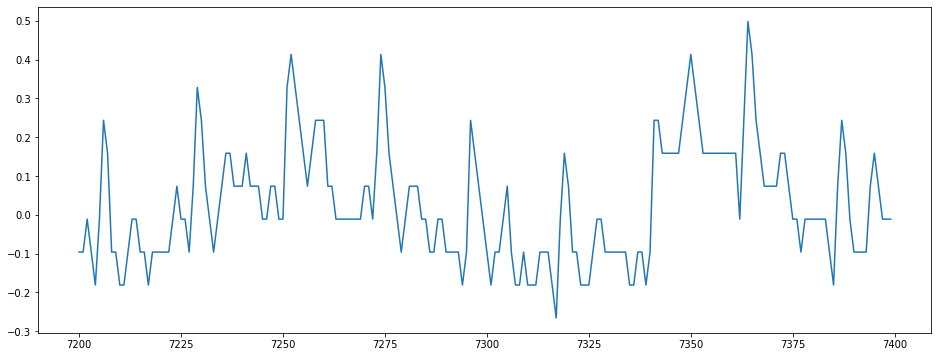

In [383]:
plt.plot(np.arange(7200,7400,1), qm4[7200:7400])

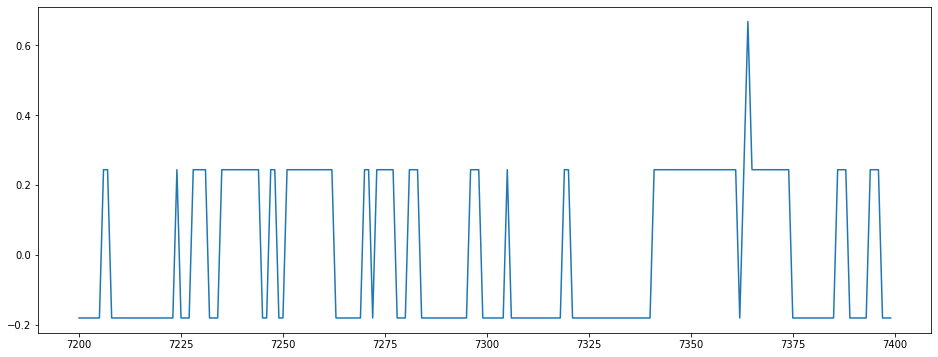

In [384]:
plt.plot(np.arange(7200,7400,1), qm2[7200:7400])

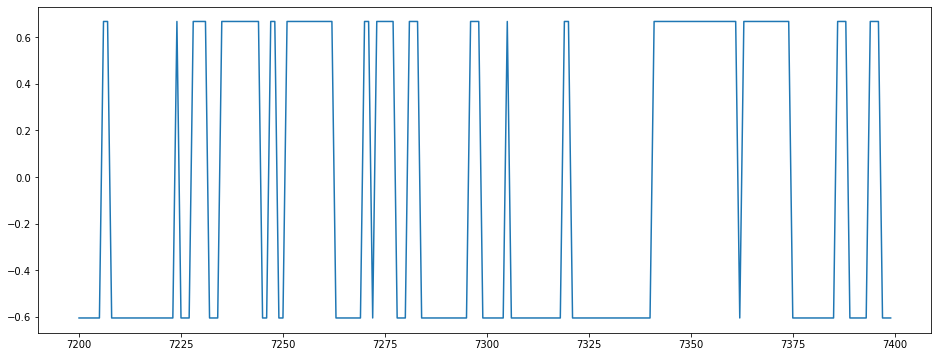

In [385]:
plt.plot(np.arange(7200,7400,1), qm1[7200:7400])

<h3 style="color:red;"><left>Exercise 3.5. Error Analysis</left></h3>

**1. Compute the error signal for the quantized speech for $7$, $4$, $2$ and $1$ b/sample.**

In [386]:
# insert your code here
e7 = qs7 - speech 
e4 = qs4 - speech
e2 = qs2 - speech
e1 = qs1 - speech

**2. Use the command [```plt.hist(E, bins=20)```](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) to generate 20-bin histograms for each of the four error signals.**

(array([ 998.,  921., 1353.,  895.,  991., 2122.,  894.,  950., 1178.,
         748., 1225., 1115., 2013., 1011.,  804., 1486.,  673.,  887.,
        1371., 2124.]),
 array([-5.94588152e-03, -5.35782942e-03, -4.76977731e-03, -4.18172521e-03,
        -3.59367311e-03, -3.00562100e-03, -2.41756890e-03, -1.82951679e-03,
        -1.24146469e-03, -6.53412586e-04, -6.53604823e-05,  5.22691622e-04,
         1.11074373e-03,  1.69879583e-03,  2.28684793e-03,  2.87490004e-03,
         3.46295214e-03,  4.05100424e-03,  4.63905635e-03,  5.22710845e-03,
         5.81516056e-03]),
 <BarContainer object of 20 artists>)

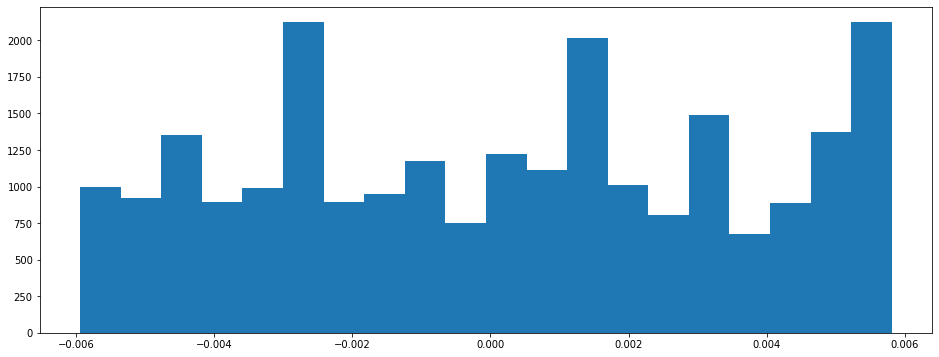

In [387]:
# insert your code here
plt.hist(e7, bins=20)

(array([1435., 1957., 2426., 2061., 2159., 1507., 1312.,  905.,  913.,
         697.,  847.,  657.,  773.,  898.,  637.,  760.,  983.,  706.,
         917., 1209.]),
 array([-0.05068359, -0.04561523, -0.04054687, -0.03547852, -0.03041016,
        -0.0253418 , -0.02027344, -0.01520508, -0.01013672, -0.00506836,
         0.        ,  0.00506836,  0.01013672,  0.01520508,  0.02027344,
         0.0253418 ,  0.03041016,  0.03547852,  0.04054687,  0.04561523,
         0.05068359]),
 <BarContainer object of 20 artists>)

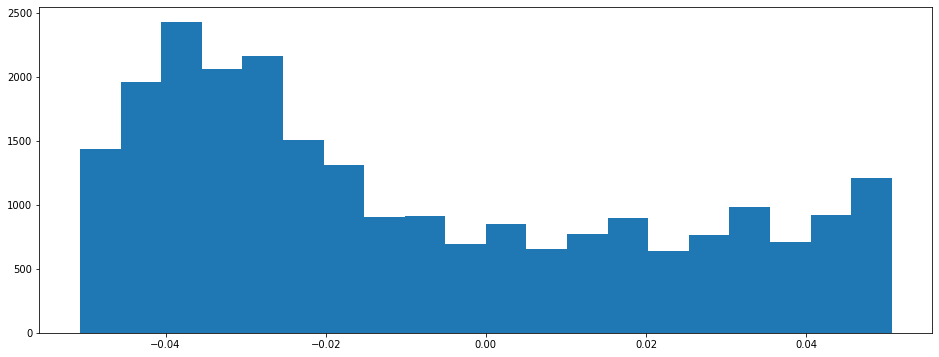

In [388]:
plt.hist(e4, bins=20)

(array([7943., 2886., 1162.,  878.,  766.,  501.,  486.,  440.,  433.,
         478.,  361.,  446.,  454.,  447.,  465.,  487.,  720.,  911.,
        1171., 2324.]),
 array([-2.52766927e-01, -2.27478027e-01, -2.02189128e-01, -1.76900228e-01,
        -1.51611328e-01, -1.26322428e-01, -1.01033529e-01, -7.57446289e-02,
        -5.04557292e-02, -2.51668294e-02,  1.22070312e-04,  2.54109701e-02,
         5.06998698e-02,  7.59887695e-02,  1.01277669e-01,  1.26566569e-01,
         1.51855469e-01,  1.77144368e-01,  2.02433268e-01,  2.27722168e-01,
         2.53011068e-01]),
 <BarContainer object of 20 artists>)

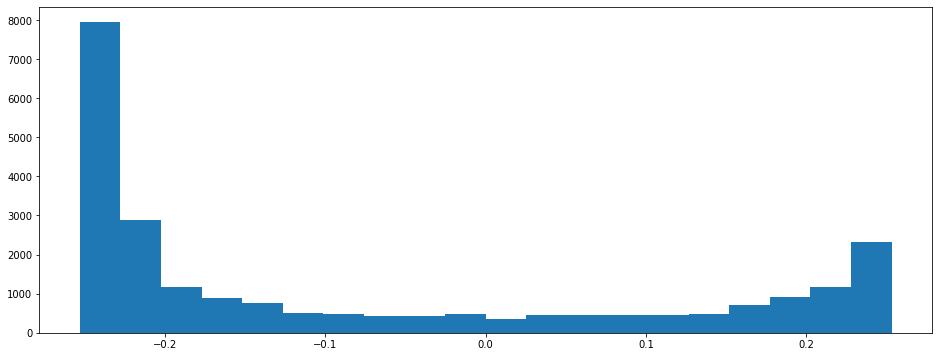

In [389]:
plt.hist(e2, bins=20)

(array([1.1985e+04, 1.9070e+03, 1.0420e+03, 7.5200e+02, 3.3700e+02,
        1.3700e+02, 6.9000e+01, 3.3000e+01, 4.0000e+00, 1.1000e+01,
        2.6000e+01, 1.8000e+01, 3.0000e+01, 4.4000e+01, 1.0500e+02,
        2.2600e+02, 4.7400e+02, 8.4100e+02, 1.4540e+03, 4.2640e+03]),
 array([-7.60498047e-01, -6.84436035e-01, -6.08374023e-01, -5.32312012e-01,
        -4.56250000e-01, -3.80187988e-01, -3.04125977e-01, -2.28063965e-01,
        -1.52001953e-01, -7.59399414e-02,  1.22070312e-04,  7.61840820e-02,
         1.52246094e-01,  2.28308105e-01,  3.04370117e-01,  3.80432129e-01,
         4.56494141e-01,  5.32556152e-01,  6.08618164e-01,  6.84680176e-01,
         7.60742188e-01]),
 <BarContainer object of 20 artists>)

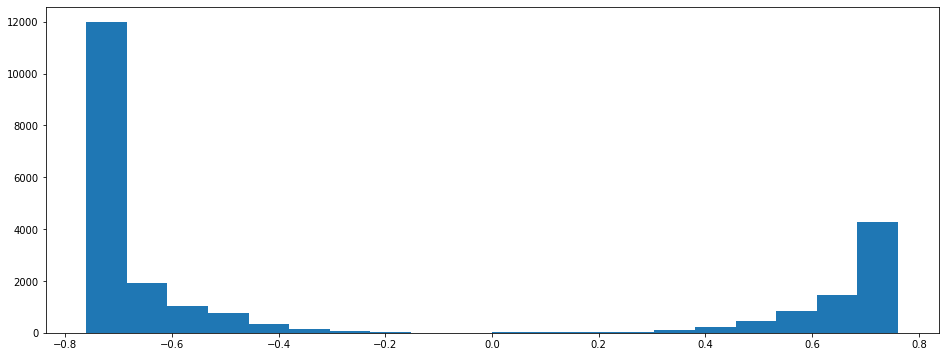

In [390]:
plt.hist(e1, bins=20)

**3. How does the number of quantization levels seem to affect the shape of the distribution?**

insert your answer here

**4. Explain why the error histograms you obtain might not be uniform?**

insert your answer here

**5. Compute and plot an estimate of the autocorrelation function for each of the four error signals using the following commands:**
```python
lags, r = xcorr(E, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

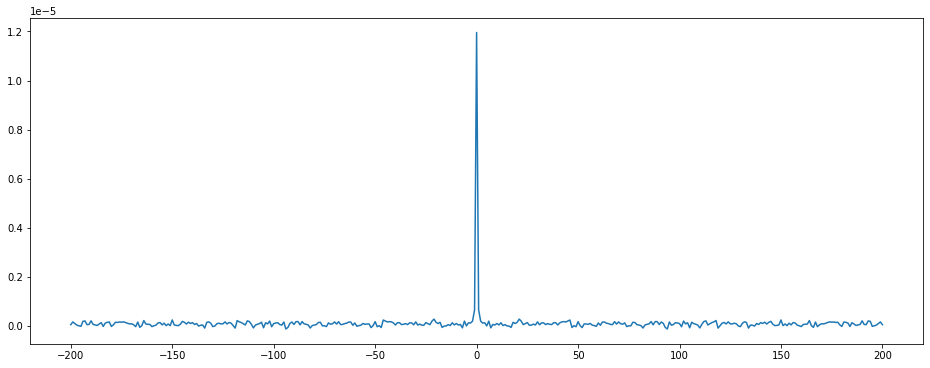

In [391]:
# insert your code here
lags, r = xcorr(e7, e7, maxlags=200)
plt.plot(lags, r)
plt.show()
# better looks more like dirac delta, worse looks ulgier (convolution)

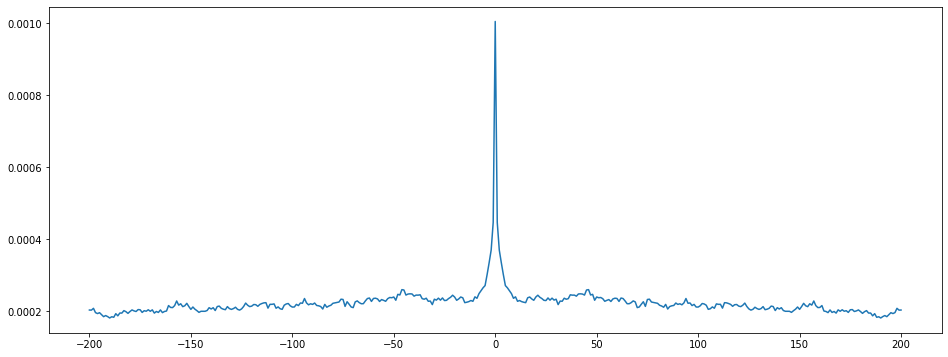

In [392]:
# insert your code here
lags, r = xcorr(e4, e4, maxlags=200)
plt.plot(lags, r)
plt.show()

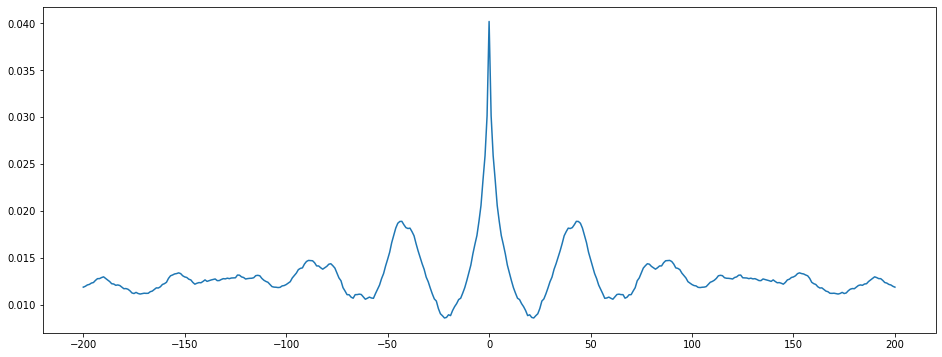

In [393]:
# insert your code here
lags, r = xcorr(e2, e2, maxlags=200)
plt.plot(lags, r)
plt.show()

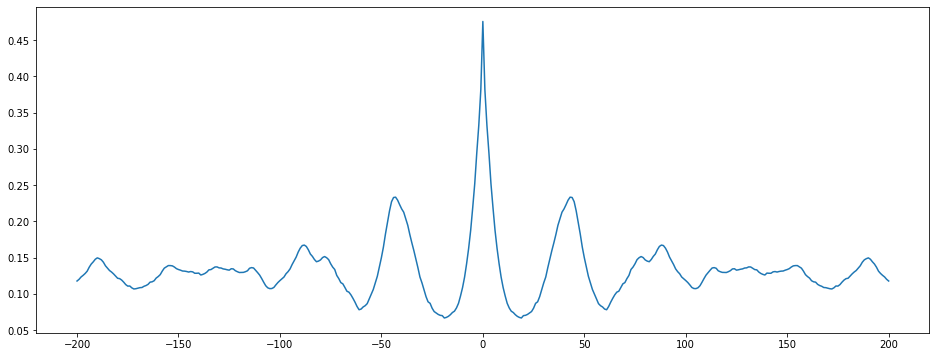

In [394]:
# insert your code here
lags, r = xcorr(e1, e1, maxlags=200)
plt.plot(lags, r)
plt.show()

**6. Now compute and plot an estimate of the cross-correlation function between the quantized speech $Y$ and each error signal $E$ using**
```python
lags, r = xcorr(E, Y, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

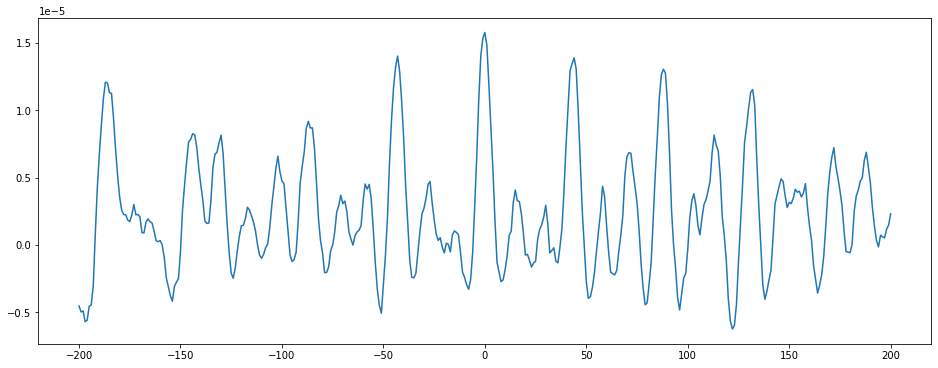

In [395]:
# insert your code here
lags, r = xcorr(e7, speech, maxlags=200)
plt.plot(lags, r)
plt.show()

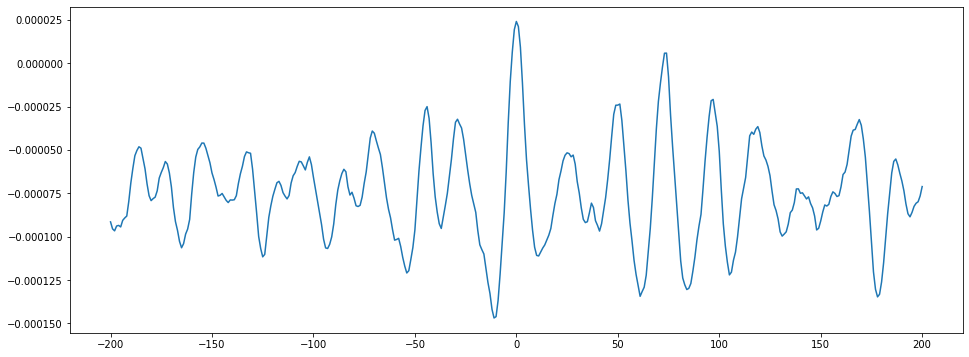

In [396]:
lags, r = xcorr(e4, speech, maxlags=200)
plt.plot(lags, r)
plt.show()

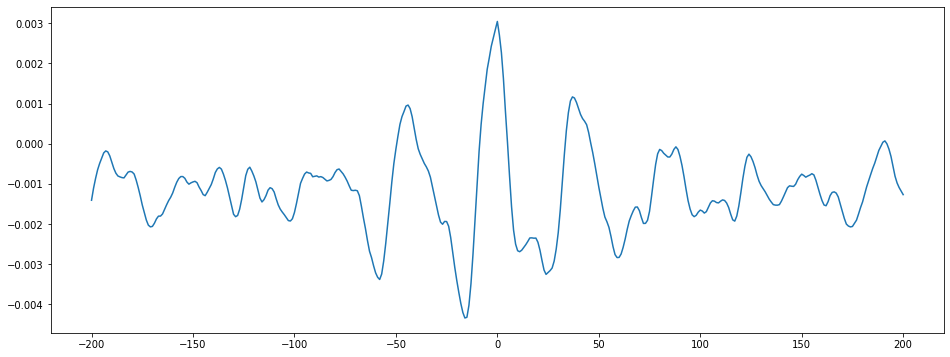

In [397]:
lags, r = xcorr(e2, speech, maxlags=200)
plt.plot(lags, r)
plt.show()

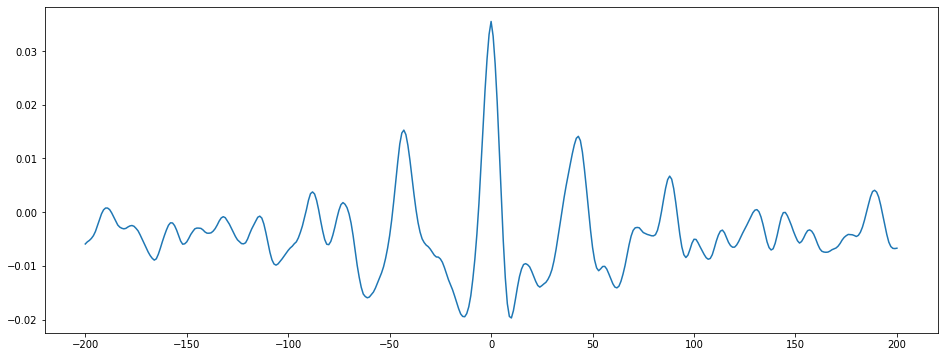

In [398]:
lags, r = xcorr(e1, speech, maxlags=200)
plt.plot(lags, r)
plt.show()

**7. Is the autocorrelation influenced by the number of quantization levels? Do samples in the error signal appear to be correlated with each other?**

insert your answer here

**8. Does the number of quantization levels influence the cross-correlation?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.6: Signal to Noise Ratio</left></h3>

**1. Complete the function below that calculates the power of a sampled signal `x`.**

In [399]:
def get_power(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    P: the power of the signal
    """
    
    P = ( 1 / len(x) ) * np.sum(x**2)
    return P

**2. Compute the PSNR for the four quantized speech signals from the previous section.**

In [400]:
# insert your code here
psnr7 = get_power(speech) / get_power(e7)

In [401]:
psnr4 = get_power(speech) / get_power(e4)

In [402]:
psnr2 = get_power(speech) / get_power(e2)

In [403]:
psnr1 = get_power(speech) / get_power(e1)

**3. Assuming that the speech is sampled at $8$kHz, plot the rate distortion curve using $\frac{1}{\text{PSNR}}$ as the measure of distortion. Generate this curve by computing the PSNR for $7, 6, 5,\dots, 1$ bits/sample. Make sure the axes of the graph are in terms of *distortion* and *bit rate*.**

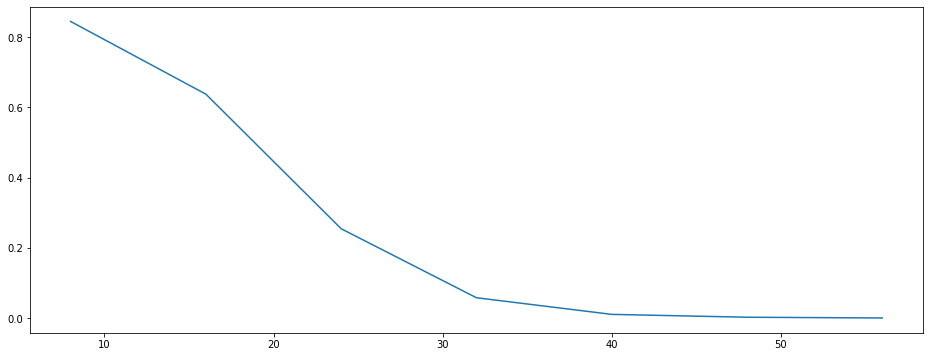

In [412]:
# insert your code here
qs7 = Uquant(speech, 7)
qs6 = Uquant(speech, 6)
qs5 = Uquant(speech, 5)
qs4 = Uquant(speech, 4)
qs3 = Uquant(speech, 3)
qs2 = Uquant(speech, 2)
qs1 = Uquant(speech, 1)

e7 = qs7 - speech 
e6 = qs6 - speech 
e5 = qs5 - speech 
e4 = qs4 - speech
e3 = qs3 - speech 
e2 = qs2 - speech
e1 = qs1 - speech

psnr7 = get_power(qs7) / get_power(e7)
psnr6 = get_power(qs6) / get_power(e6)
psnr5 = get_power(qs5) / get_power(e5)
psnr4 = get_power(qs4) / get_power(e4)
psnr3 = get_power(qs3) / get_power(e3)
psnr2 = get_power(qs2) / get_power(e2)
psnr1 = get_power(qs1) / get_power(e1)
distort = [1/psnr1, 1/psnr2, 1/psnr3, 1/psnr4, 1/psnr5, 1/psnr6, 1/psnr7]

plt.plot(np.arange(1, 8, 1) * 8, distort)


<h3 style="color:red;"><left>Exercise 3.8</left></h3>

**1. First plot a $40$-bin histogram of this speech signal using ```plt.hist(speech, bins=40)```, and make an initial guess of the four optimal quantization levels. Print out the histogram and the initial guess of the quantization levels.**

In [405]:
# insert your code here


**2. Use the function ```lloyds()``` to compute an optimal $4$-level codebook using `speech.au` as the training set.**

In [406]:
# insert your code here


**3. Once the optimal codebook is obtained, use the `codebook` and `partition` vectors to quantize the speech signal.**

* This may be done with a *for* loop and *if* statements.

In [407]:
# insert your code here


**4. Compute the error signal and PSNR.**

In [408]:
# insert your code here


**5. Plot the histogram in Q1 again. However, on this histogram plot, also mark where the optimal quantization levels fall along the $x$-axis.**

* To draw a vertical line, use `plt.axvline(x=0.8, color='r')` to plot a vertical line $x=0.8$ of red color.

In [409]:
# insert your code here


**6. Play the quantized audio, and compare the sound quality of the uniform- and max-quantized signals.**

In [410]:
# insert your code here


**7. If the speech signal was uniformly distributed, would the two quantizers be the same? Explain your answer.**

insert your answer here